# Credit Card User Segmentation Data Challenge

This is a 4-hour data challenge provided by the Insight team in week 6. 

## The Problem

You work as a data scientist at a credit card company. A senior VP is leading an effort to reduce costs associated with signup incentives by offering credit cards with carefully targeted benefits that will attract new cardholders. As a first step, she would like you to examine cardholder data collected over the last 6 months in order to understand the various kinds of users who use the company’s products. She is especially interested in getting an idea of which benefits to associate with each new card offering. 

## The Data

The data consists of a csv file with  8950 rows (one for each cardholder) organized in columns with descriptive headers.

Column information is as follows:

- CUST_ID : Credit card holder ID
- BALANCE : Monthly average balance (based on daily balance averages)
- BALANCE_FREQUENCY : Ratio of last 12 months with balance
- PURCHASES : Total purchase amount spent during last 12 months
- ONEOFF_PURCHASES : Total amount of one-off purchases
- INSTALLMENTS_PURCHASES : Total amount of installment purchases
- CASH_ADVANCE : Total cash-advance amount
- PURCHASES_ FREQUENCY : Frequency of purchases (percentage of months with at least one purchase)
- ONEOFF_PURCHASES_FREQUENCY : Frequency of one-off-purchases
- PURCHASES_INSTALLMENTS_FREQUENCY : Frequency of installment purchases
- CASH_ADVANCE_ FREQUENCY : Cash-Advance frequency
- AVERAGE_PURCHASE_TRX : Average amount per purchase transaction
- CASH_ADVANCE_TRX : Average amount per cash-advance transaction
- PURCHASES_TRX : Average amount per purchase transaction
- CREDIT_LIMIT : Credit limit
- PAYMENTS : Total payments (due amount paid by the customer to decrease their statement balance) in the period


Some useful definitions:

- Balance: total amount of money you owe the credit card company
- Purchases: purchases made by customer (total money spent)
- Oneoff purchases: Non-recurring payments
- Installment purchases: Purchases made in a repeating pattern (e.g., subscriptions)
- Cash Advance: short term cash loan


## The Goal

Basically, the VP wants to identify clusters of users that have similar purchasing behavior. They also want to use this information to reduce the price of incentives used to try to get more customers to purchase credit cards. Because the data is limited to current customers, I will pose the problem as follows and attempt to solve it efficiently.

Incentives are commonly used to sell new credit cards to customers. If I can identify customers with similar behavior, I can better understand the purchasing environment. However, the key here is to sell a product, so I will treat each customer as having a single type of credit card (e.g., travel rewards) **check for duplicates to test this assumption**. Then I will try to cluster users based on two purchasing behaviors, so that I can say as an example, if a user in this cluster has a travel reward card, incentivize cash back, or if they currently have a cash back card, incentivize a travel reward credit card. This is built on the assumption that they currently have a credit card (hence the data) and that the credit card they currently have has some reward program (so we can incentivize the other).



### Primary types of credit cards

There is a fixed number of reward programs companies currently offer and their intended market:

- cash back rewards:                   cash advance / installment purchases
- general reward points:               purchases / installment purchases
- hotel, travel, retail, gas rewards:  oneoff payments / purchase frequency

There are also
- balance transfer credit cards:       high balance
- low interest credit cards:           low balance 
- poor credit credit cards:            high balance / cash advance
- prepaid credit cards:                high balance 

Will iterate on this



### Import Libraries

In [36]:
import pandas as pd
import pandas_summary 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# EDA 

Let's take a look at the data and determine the distributions. Also look for duplicates and incorrect data

In [22]:
df = pd.read_csv('cc_info.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Let's look at the data distribution for quick info

In [23]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Looks like the purchases has outliers or isn't normally distributed (Std > mean), same iwth oneoff, installment, etc.

Any NaN values?

In [24]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Quick plots

#### Balance

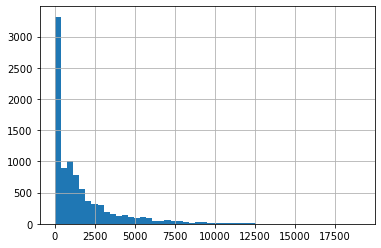

In [29]:
df['BALANCE'].hist(bins=50) # balance vs count

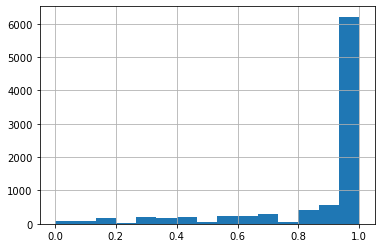

In [31]:
df['BALANCE_FREQUENCY'].hist(bins=15)

#### Purchases

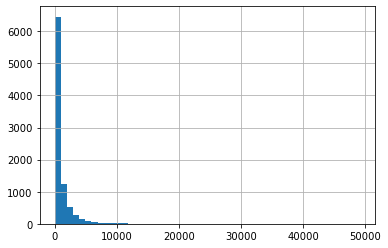

In [32]:
df['PURCHASES'].hist(bins=50) # purchases vs count

#### Credit Limit

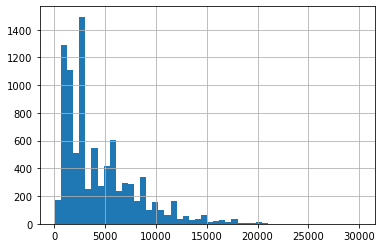

In [35]:
df['CREDIT_LIMIT'].hist(bins=50) # cash advance vs count

#### Some scatters

Let's take a look at balance vs cash advance


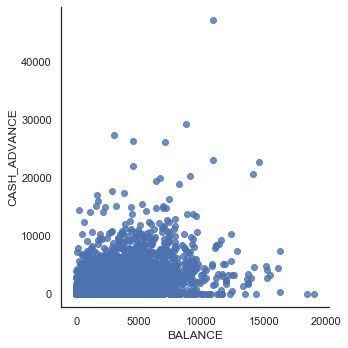

In [39]:
lm = sns.lmplot(x="BALANCE", y="CASH_ADVANCE", data=df, fit_reg=False)
axes = lm.axes


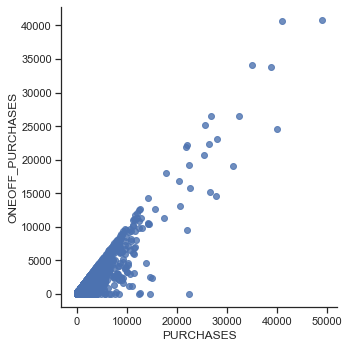

In [43]:
lm = sns.lmplot(x="PURCHASES", y="ONEOFF_PURCHASES", data=df, fit_reg=False)
axes = lm.axes

This is beginning to show relationships in the data, here that oneoff purchases can never exceed total purchases.

Let's take a closer look at purchases, purchases_frequency, and purchases_trx

In [73]:
df[['PURCHASES','PURCHASES_FREQUENCY','PURCHASES_TRX']].head()

,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_TRX
0,95.40,0.166667,2
1,0.00,0.000000,0
2,773.17,1.000000,12
3,1499.00,0.083333,1
4,16.00,0.083333,1


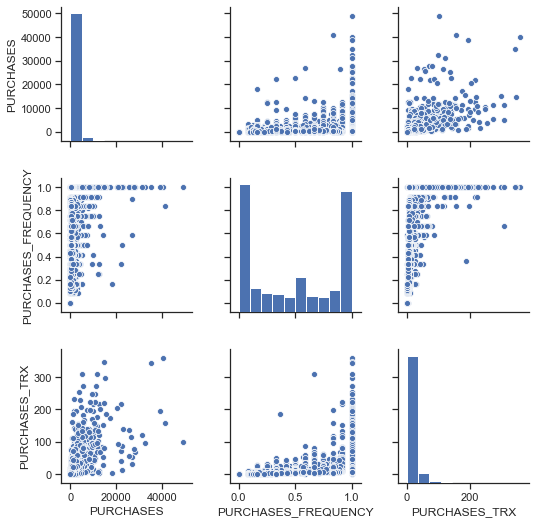

In [333]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

g = sns.pairplot(df[['PURCHASES','PURCHASES_FREQUENCY','PURCHASES_TRX']])
#g = sns.pairplot(df)

Let's take a look at colinearity - Do Purchases = oneoff_purchases + installment_purchases ?

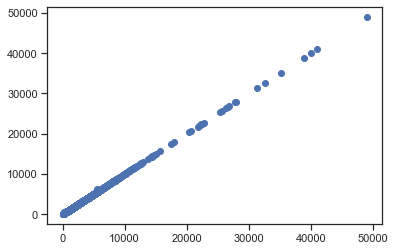

In [79]:
# Initialize the data
data1 = df['PURCHASES']
data2 = df['ONEOFF_PURCHASES'] + df['INSTALLMENTS_PURCHASES']

# Create a scatter plot
plt.scatter(data1, data2)

# Show the plot
plt.show()

There is colinearity in the data, which we need to keep an eye on. Let's take a look at correlations

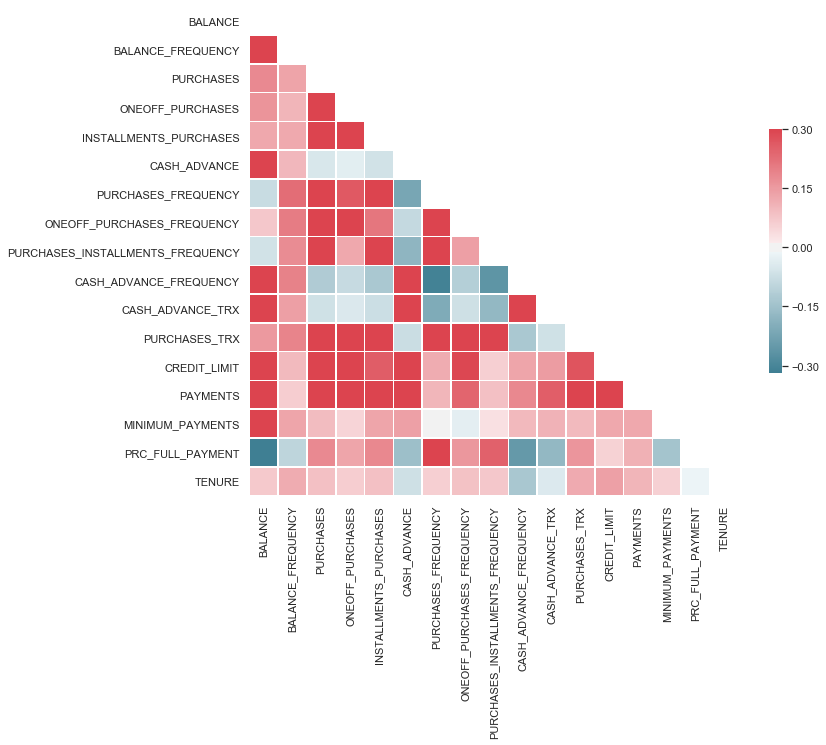

In [38]:
sns.set(style="white")


# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The data have a high degree of correlation. For the sake of this analysis, let's limit the features to those most easily used to incentivize new card sales.

- Balance
- Oneoff Purchases
- Cash Advance
- Average Purchase Transaction
- Credit Limit


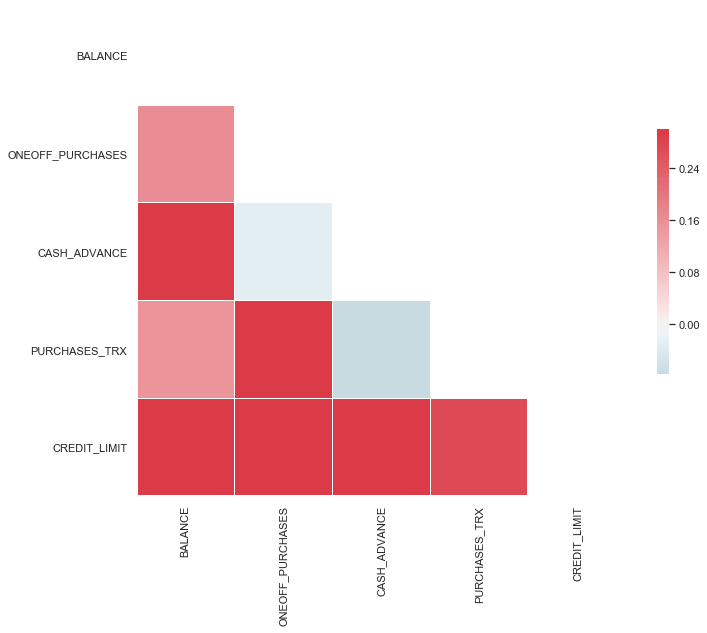

In [81]:
sns.set(style="white")


# Compute the correlation matrix
corr = df[['BALANCE','ONEOFF_PURCHASES','CASH_ADVANCE','PURCHASES_TRX','CREDIT_LIMIT']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Almost all positively correlated...

## Clustering

In order to cluster the users, we need to determine which clustering algorithm to use. 

Some things to consider:

- Data Distribution (non-normal, non-linear)
- Data type (numerical)
- Number of null values (can we fill these in?)


We have a few general options to choose from:
- Partitioning methods (k-means)
- Hierarchechal methods (bottom-up, top-down)
- Density-based methods (DBSCAN, optics)


For this problem, we have numeric data and an unknown number of groups, so we will first use a density based method (DBSCAN) to try to determine how many distinguishable clusters we have and what they have in common.

## DBSCAN to Cluster the Data

In [45]:
# Import Libraries
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


In [47]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Train DBSCAN on the data

In [217]:
# Compute DBSCAN
df_copy = df.drop(columns='CUST_ID')
df_copy = df_copy.dropna()
#X = df_copy[['BALANCE','ONEOFF_PURCHASES','CASH_ADVANCE','PURCHASES_TRX','CREDIT_LIMIT']].values
#X = df_copy[['BALANCE','PURCHASES_INSTALLMENTS_FREQUENCY', 'PRC_FULL_PAYMENT','PURCHASES_FREQUENCY','CREDIT_LIMIT']].values
X = df_copy[['PURCHASES','ONEOFF_PURCHASES','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_TRX']].values


### Hyperparameterization and Epsilon

The primary variable to set with dbscan is eps :: the radius from the core point in which minPts must be within the circle

To have a better understanding of the distances within our data, let's calculate the k-NN distances and look at the distributions

In [218]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=len(X)).fit(X)
distances, indices = nbrs.kneighbors(X)

In [219]:
distances[1]
distances.mean()

array([    0.        ,     0.        ,     0.        , ...,
       51537.93235171, 57753.5647487 , 63768.08865214])

1816.4514037498232

Obviously these are not normally distributed, let's take a closer look

(array([5.112e+03, 1.239e+03, 7.410e+02, 4.290e+02, 2.810e+02, 2.040e+02,
        1.190e+02, 9.300e+01, 9.100e+01, 6.500e+01, 4.600e+01, 2.900e+01,
        2.400e+01, 2.200e+01, 1.800e+01, 1.100e+01, 1.700e+01, 1.600e+01,
        8.000e+00, 9.000e+00, 5.000e+00, 6.000e+00, 4.000e+00, 6.000e+00,
        2.000e+00, 5.000e+00, 3.000e+00, 4.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+0

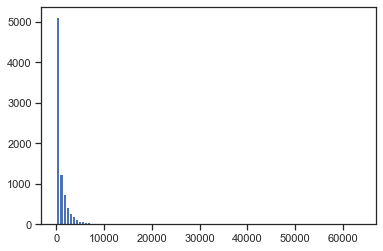

In [220]:
a = distances[1]
plt.hist(a,bins=100)
plt.show()

This is just a single point, but in spot checking the data, the distributions look similary.

Taking the mean of this wouldn't work well, we'd end up with essentially a single cluster. Let's try the mean/10

In [221]:
distances[100].mean()/10

123.36622748039179

### Train the model

In [268]:
db = DBSCAN(eps=250, min_samples=20).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [269]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print('Total number of customers: %d' % len(df))

Estimated number of clusters: 3
Estimated number of noise points: 517
Total number of customers: 8950


### Plot the clusters

Text(0.5, 1.0, 'DBSCAN')

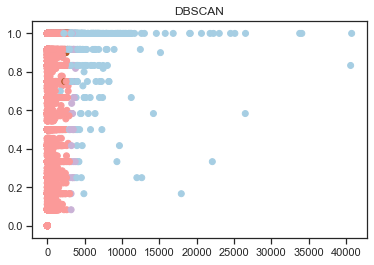

In [273]:
y_pred = db.fit_predict(X)
plt.scatter(X[:,1], X[:,2],c=y_pred, cmap='Paired')
plt.title("DBSCAN")

In [302]:
# Compute DBSCAN
df_copy = df.drop(columns='CUST_ID')
df_copy = df_copy.dropna()
#X = df_copy[['BALANCE','ONEOFF_PURCHASES','CASH_ADVANCE','PURCHASES_TRX','CREDIT_LIMIT']].values
#X = df_copy[['BALANCE','PURCHASES_INSTALLMENTS_FREQUENCY', 'PRC_FULL_PAYMENT','PURCHASES_FREQUENCY','CREDIT_LIMIT']].values
#X = df_copy[['PURCHASES','ONEOFF_PURCHASES','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_TRX']].values
X = df_copy[['BALANCE','PRC_FULL_PAYMENT','PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY']].values
#X = df_copy

In [310]:
from sklearn.cluster import KMeans
def kmeans(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    y_pred = km.predict(X)
    plt.scatter(X[:,0], X[:,2],c=y_pred, cmap='Paired')
    plt.title("K-means")
    
def plt_kmeans(y_pred,xa,ya):
    plt.scatter(X[:,xa], X[:,ya],c=y_pred, cmap='Paired')
    plt.title("K-means")

In [308]:
ss = StandardScaler()
X = ss.fit_transform(X)
km = KMeans(n_clusters=6)
km.fit(X)
y_pred = km.predict(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# [['BALANCE','PRC_FULL_PAYMENT','PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY']]

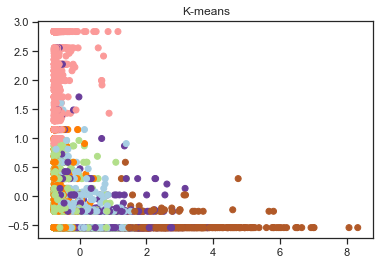

In [311]:
# [['BALANCE','PRC_FULL_PAYMENT','PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY']]
plt_kmeans(y_pred,0,1) # Balance vs Prc full payment

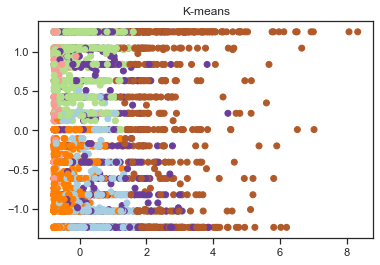

In [312]:
plt_kmeans(y_pred,0,2) # Balance vs purchase frequency

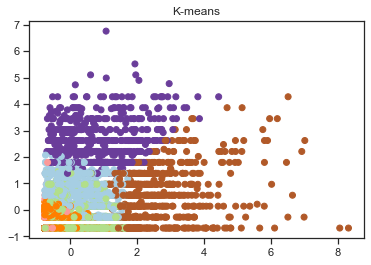

In [314]:
plt_kmeans(y_pred,0,3) # Balance vs cash advance frequency

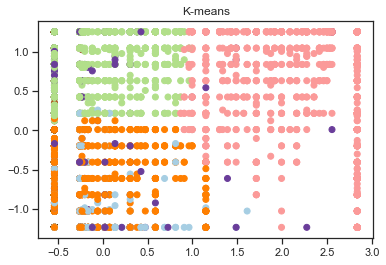

In [315]:
# [['BALANCE','PRC_FULL_PAYMENT','PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY']]
plt_kmeans(y_pred,1,2) # prc full payment vs purchases frequency

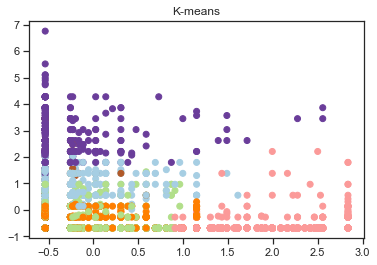

In [330]:
# [['BALANCE','PRC_FULL_PAYMENT','PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY']]
plt_kmeans(y_pred,1,3) # prc full payment vs cash advance frequency


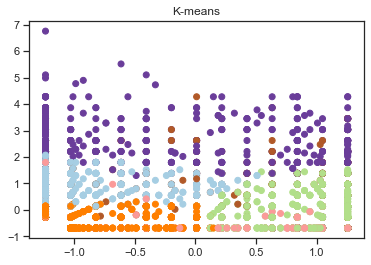

In [332]:
# [['BALANCE','PRC_FULL_PAYMENT','PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY']]
plt_kmeans(y_pred,2,3) # purchases frequency vs cash advance frequency
plt.savefig('p_freq_cash_adv.png')

array([3, 0, 1, ..., 1, 3, 1], dtype=int32)